In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/nr802/Downloads/Machine learning Projects/loan.csv")

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df_num=df.select_dtypes(include=[np.number])
df_cat=df.select_dtypes(include=['object']) 

In [9]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [10]:
df_cat.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Imputation for Numerical Columns

In [11]:
print(df_num['ApplicantIncome'].mean())
print(df_num['ApplicantIncome'].median())

5403.459283387622
3812.5


In [12]:
print(df_num['CoapplicantIncome'].mean())
print(df_num['CoapplicantIncome'].median())

1621.2457980271008
1188.5


In [13]:
print(df_num['LoanAmount'].mean())
print(df_num['LoanAmount'].median())

146.41216216216216
128.0


In [14]:
print(df_num['Loan_Amount_Term'].mean())
print(df_num['Loan_Amount_Term'].median())

342.0
360.0


In [15]:
print(df_num['Credit_History'].mean())
print(df_num['Credit_History'].median())

0.8421985815602837
1.0


In [16]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Initialize a dictionary to store statistics
statistics = {
    'Column': [],
    'Skewness': [],
    'Kurtosis': [],
    'Variance': [],
    'Standard Deviation': []
}

# Calculate statistics for each numeric column
for column in numeric_columns.columns:
    statistics['Column'].append(column)
    statistics['Skewness'].append(skew(numeric_columns[column].dropna()))
    statistics['Kurtosis'].append(kurtosis(numeric_columns[column].dropna()))
    statistics['Variance'].append(numeric_columns[column].var())
    statistics['Standard Deviation'].append(numeric_columns[column].std())

# Convert the dictionary to a DataFrame for better visualization
statistics_df = pd.DataFrame(statistics)

# Display the result
print(statistics_df)


              Column  Skewness   Kurtosis      Variance  Standard Deviation
0    ApplicantIncome  6.523526  60.039040  3.732039e+07         6109.041673
1  CoapplicantIncome  7.473217  84.256377  8.562930e+06         2926.248369
2         LoanAmount  2.670763  10.303772  7.325190e+03           85.587325
3   Loan_Amount_Term -2.356504   6.608008  4.240668e+03           65.120410
4     Credit_History -1.877351   1.524447  1.331362e-01            0.364878


KNN

In [17]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Adjust 'n_neighbors' as needed

# Apply the KNNImputer to the numerical DataFrame
df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

# Check the imputed values
df_num_imputed[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,147.8,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode categorical columns
encoders = {col: LabelEncoder() for col in df_cat.columns}
for col, encoder in encoders.items():
    df_cat[col] = encoder.fit_transform(df_cat[col].astype(str))

# Step 2: Apply KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_cat_imputed = pd.DataFrame(imputer.fit_transform(df_cat), columns=df_cat.columns)

# Step 3: Decode categorical columns back to original labels
for col, encoder in encoders.items():
    df_cat_imputed[col] = encoder.inverse_transform(df_cat_imputed[col].astype(int))

# Check the result
print(df_cat_imputed)

    Loan_ID Gender Married Dependents Education Self_Employed Property_Area  \
0         0      1       0          0         0             0             2   
1         1      1       1          1         0             0             0   
2         2      1       1          0         0             1             2   
3         3      1       1          0         1             0             2   
4         4      1       0          0         0             0             2   
..      ...    ...     ...        ...       ...           ...           ...   
609     609      0       0          0         0             0             0   
610     610      1       1          3         0             0             0   
611     611      1       1          1         0             0             2   
612     612      1       1          2         0             0             2   
613     613      0       0          0         0             1             1   

    Loan_Status  
0             1  
1             0

Imputations for Categorical Columns

In [27]:
for col in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status',]:
    df_cat[col].fillna(df_cat[col].value_counts().idxmax(),inplace=True)

C:\Users\nr802\AppData\Local\Temp\ipykernel_5536\774857045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[col].fillna(df_cat[col].value_counts().idxmax(),inplace=True)
C:\Users\nr802\AppData\Local\Temp\ipykernel_5536\774857045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [28]:
df_cat.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [29]:
df_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
df_cat.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,2.000000,1.000000


In [31]:
# Fill null values 

df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('Yes')
df['Dependents'] = df['Dependents'].fillna(0)
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(1)


In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df['Dependents']=df['Dependents'].replace('[\+]','',regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
C:\Users\nr802\AppData\Local\Temp\ipykernel_5536\2028149535.py:1: SyntaxWarning: invalid escape sequence '\+'
  df['Dependents']=df['Dependents'].replace('[\+]','',regex=True).astype(float)


In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [35]:
for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])


In [36]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# Correlationship between numerical columns and numerical target

In [37]:
df_num_corr=df_num.corr()

In [38]:
df_num_corr["LoanAmount"]

ApplicantIncome      0.570909
CoapplicantIncome    0.188619
LoanAmount           1.000000
Loan_Amount_Term     0.039447
Credit_History      -0.008433
Name: LoanAmount, dtype: float64

In [39]:
df_num_cols = []
df_num_cols.extend(df_num_corr[(df_num_corr["LoanAmount"]>0.3)].index.values)
df_num_cols.extend(df_num_corr[(df_num_corr["LoanAmount"]<-0.3) ].index.values)

In [40]:
df_num_cols

['ApplicantIncome', 'LoanAmount']

# Correlationship between categorical columns and continous target variable using one way ANNOVA

In [41]:
from scipy.stats import f_oneway

In [42]:
df_cat['LA']=df_num['LoanAmount']

In [43]:
import pandas as pd
from scipy.stats import f_oneway
df=pd.read_csv("Loan.csv")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize a dictionary to store ANOVA results
anova_results = {}

# Perform ANOVA for each combination of categorical and numerical columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        try:
            # Group numerical data by the categorical column levels
            groups = [df[df[cat_col] == level][num_col].dropna() for level in df[cat_col].unique()]
            
            # Ensure there are at least two groups with data
            if len(groups) > 1 and all(len(group) > 0 for group in groups):
                # Perform ANOVA test
                f_stat, p_value = f_oneway(*groups)
                anova_results[f"{cat_col} vs {num_col}"] = (f_stat, p_value)
            else:
                anova_results[f"{cat_col} vs {num_col}"] = "Insufficient data for ANOVA"
        except Exception as e:
            anova_results[f"{cat_col} vs {num_col}"] = str(e)

# Display results
for key, value in anova_results.items():
    if isinstance(value, tuple):
        print(f"{key}: F-Statistic = {value[0]:.4f}, P-Value = {value[1]:.4f}")
    else:
        print(f"{key}: {value}")


c:\Users\nr802\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


Loan_ID vs ApplicantIncome: F-Statistic = nan, P-Value = nan
Loan_ID vs CoapplicantIncome: F-Statistic = nan, P-Value = nan
Loan_ID vs LoanAmount: Insufficient data for ANOVA
Loan_ID vs Loan_Amount_Term: Insufficient data for ANOVA
Loan_ID vs Credit_History: Insufficient data for ANOVA
Gender vs ApplicantIncome: Insufficient data for ANOVA
Gender vs CoapplicantIncome: Insufficient data for ANOVA
Gender vs LoanAmount: Insufficient data for ANOVA
Gender vs Loan_Amount_Term: Insufficient data for ANOVA
Gender vs Credit_History: Insufficient data for ANOVA
Married vs ApplicantIncome: Insufficient data for ANOVA
Married vs CoapplicantIncome: Insufficient data for ANOVA
Married vs LoanAmount: Insufficient data for ANOVA
Married vs Loan_Amount_Term: Insufficient data for ANOVA
Married vs Credit_History: Insufficient data for ANOVA
Dependents vs ApplicantIncome: Insufficient data for ANOVA
Dependents vs CoapplicantIncome: Insufficient data for ANOVA
Dependents vs LoanAmount: Insufficient data 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(columns='Loan_Status')
y = df['Loan_Status']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

## LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

In [54]:
# Ensure all preprocessing is applied to the entire dataset
data = df.drop(columns=["Loan_ID"], errors="ignore")

# Handle missing values
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Convert categorical variables to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split data into features and target
X = data.drop(columns=["Loan_Status"])
y = data["Loan_Status"]

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify that all columns are numeric
assert X_train.select_dtypes(include='object').empty, "Non-numeric columns found in training data."
assert X_test.select_dtypes(include='object').empty, "Non-numeric columns found in testing data."

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\nr802\AppData\Local\Temp\ipykernel_5536\3895881676.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
C:\Users\nr802\AppData\Local\Temp\ipykernel_5536\3895881676.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



c:\Users\nr802\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\nr802\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [58]:
accuracyscore = accuracy_score(y_test,y_pred)*100
precision=metrics.precision_score(y_test, y_pred)
sensitivity_recall=metrics.recall_score(y_test, y_pred)

print("Accuracy =", round(accuracyscore,2),'%')
print("precision =",round(precision,2))
print("sensitivity_recall =",round(sensitivity_recall,2))

Accuracy = 78.86 %
precision = 0.76
sensitivity_recall = 0.99


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
y_pred1 = model1.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [62]:
accuracyscore = accuracy_score(y_test,y_pred1)*100
precision=metrics.precision_score(y_test, y_pred1)
sensitivity_recall=metrics.recall_score(y_test, y_pred1)

print("Accuracy =", round(accuracyscore,2),'%')
print("precision =",round(precision,2))
print("sensitivity_recall =",round(sensitivity_recall,2))

Accuracy = 77.24 %
precision = 0.75
sensitivity_recall = 0.96


In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


0


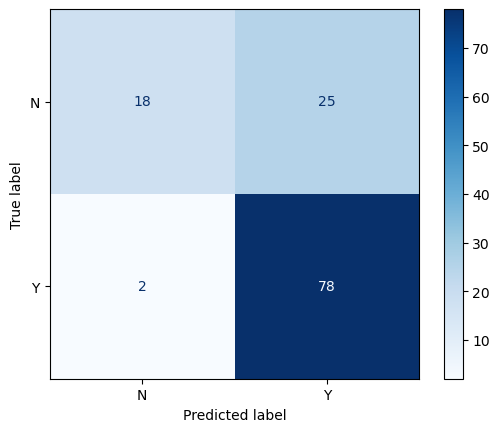

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Check for missing values in the target column
print(df['Loan_Status'].isna().sum())  # Replace 'target_column' with your target column name

# Drop rows with NaN in the target column
df = df.dropna(subset=['Loan_Status'])

# Define features (X) and target variable (y)
X = df.drop(columns=['Loan_Status'])  # Features
y = df['Loan_Status']                # Target

# Encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()


## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred2 = model2.predict(X_test)
y_pred2

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N'], dtype=object)

In [68]:
accuracyscore = accuracy_score(y_test,y_pred2)*100
precision=metrics.precision_score(y_test, y_pred2)
sensitivity_recall=metrics.recall_score(y_test, y_pred2)

print("Accuracy =", round(accuracyscore,2),'%')
print("precision =",round(precision,2))
print("sensitivity_recall =",round(sensitivity_recall,2))

ValueError: pos_label=1 is not a valid label. It should be one of ['N', 'Y']

## SVM

In [29]:
from sklearn.svm import SVC

In [30]:
model3 = SVC()
model3.fit(X_train,y_train)

SVC()

In [31]:
y_pred3 = model3.predict(X_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
accuracyscore = accuracy_score(y_test,y_pred3)*100
precision=metrics.precision_score(y_test, y_pred3)
sensitivity_recall=metrics.recall_score(y_test, y_pred3)

print("Accuracy =", round(accuracyscore,2),'%')
print("precision =",round(precision,2))
print("sensitivity_recall =",round(sensitivity_recall,2))

Accuracy = 65.04 %
precision = 0.65
sensitivity_recall = 1.0


## ADABoot

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
model4 = AdaBoostClassifier()
model4.fit(X_train,y_train)

c:\Users\nr802\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [35]:
y_pred4 = model4.predict(X_test)
y_pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [36]:
accuracyscore = accuracy_score(y_test,y_pred4)*100
precision=metrics.precision_score(y_test, y_pred4)
sensitivity_recall=metrics.recall_score(y_test, y_pred4)

print("Accuracy =", round(accuracyscore,2),'%')
print("precision =",round(precision,2))
print("sensitivity_recall =",round(sensitivity_recall,2))

Accuracy = 74.8 %
precision = 0.75
sensitivity_recall = 0.92


## XgBoost

In [37]:
from xgboost import XGBClassifier

In [38]:
model5 = XGBClassifier()
model5.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred5 = model5.predict(X_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
accuracyscore = accuracy_score(y_test,y_pred5)*100
precision=metrics.precision_score(y_test, y_pred5)
sensitivity_recall=metrics.recall_score(y_test, y_pred5)

print("Accuracy =", round(accuracyscore,2),'%')
print("precision =",round(precision,2))
print("sensitivity_recall =",round(sensitivity_recall,2))

Accuracy = 74.8 %
precision = 0.76
sensitivity_recall = 0.9
